In [60]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import argparse

In [61]:
def sigmoid_activation(x):
    return 1.0/(1.0+np.exp(-x))

In [62]:
def predict(X,W):
    
    preds=sigmoid_activation(np.dot(X,W))
    preds[preds<=0.5]=0
    preds[preds>0.5]=1
    return preds


In [63]:
epochs,alpha=100,0.01
# Generate Data py make_blobs

(X,y)=make_blobs(n_samples=1000,n_features=2,centers=2,cluster_std=1.5,random_state=1)

In [64]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [65]:
#change y 1000 samples
y=y.reshape((1000,1))
print(y.shape)

(1000, 1)


In [66]:
X = np.c_[X, np.ones((1000,1))]
print(X.shape)

(1000, 3)


In [67]:
trainx,testx,trainy,testy=train_test_split(X,y,test_size=0.5,random_state=42)
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(500, 3)
(500, 1)
(500, 3)
(500, 1)


In [68]:
W=np.random.randn(X.shape[1],1)
losses=[]

In [69]:
print("[INFO] train.....")
for epoch in range(epochs):
    # predict 
    preds=sigmoid_activation(trainx.dot(W))
    # calc loss function
    error=preds-trainy
    loss=np.sum(error**2)
    losses.append(loss)
    # calc gradient 
    gradient = trainx.T.dot(error)
    
    W+=-(alpha*gradient)
    
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1),loss))

print("[info] Evaluating....")
preds = predict(testx, W)
print(classification_report(testy, preds))
    

[INFO] train.....
[INFO] epoch=1, loss=198.0313579
[INFO] epoch=5, loss=14.3612441
[INFO] epoch=10, loss=10.4367433
[INFO] epoch=15, loss=6.9943238
[INFO] epoch=20, loss=6.9334604
[INFO] epoch=25, loss=6.2278838
[INFO] epoch=30, loss=3.8677897
[INFO] epoch=35, loss=2.3223888
[INFO] epoch=40, loss=1.1976148
[INFO] epoch=45, loss=0.8943277
[INFO] epoch=50, loss=0.5865790
[INFO] epoch=55, loss=0.3047353
[INFO] epoch=60, loss=0.1536810
[INFO] epoch=65, loss=0.0857623
[INFO] epoch=70, loss=0.0537082
[INFO] epoch=75, loss=0.0369835
[INFO] epoch=80, loss=0.0273901
[INFO] epoch=85, loss=0.0214370
[INFO] epoch=90, loss=0.0174999
[INFO] epoch=95, loss=0.0147580
[INFO] epoch=100, loss=0.0127658
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.99      1.00      1.00       250

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00  

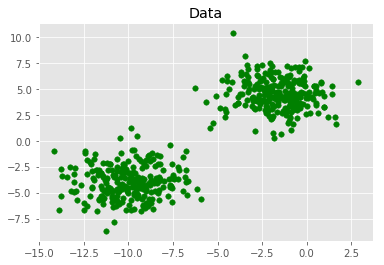

In [143]:
# plot data 
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testx[:,0],testx[:,1],marker="o",s=30,c='green')


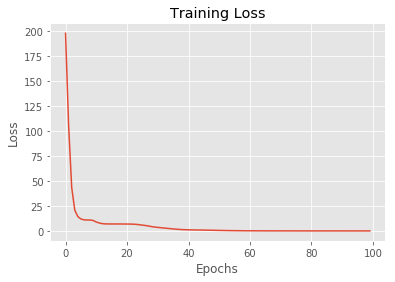

In [82]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,epochs),losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()